# VISUALIZING THE BLACK FRIDAY DATASET
### _by Michael Odartei Mills_
This notebook only visualizes some insights from the [Black Friday](https://www.kaggle.com/sdolezel/black-friday/) dataset from Kaggle

#### There are two CSV files in the aforementioned dataset;
* test.csv
* train.csv

They are uploaded below!

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv('M2_W2_black_friday_test.csv')
print(f'The shape of test data is : {test_df.shape} and columns : \n {test_df.columns}\n')

train_df = pd.read_csv('M2_W2_black_friday_train.csv')
print(f'The shape of train data is : {train_df.shape} and columns :\n {train_df.columns}')

The shape of test data is : (233599, 11) and columns : 
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

The shape of train data is : (550068, 12) and columns :
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


_**Train_df** is selected because it has more rows and an extra column_

In [3]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#mpl.rcParams ['agg.path.chunksize'] = 0

#mpl.rcParams.update (matplotlib.rc_params ())

print(mpl.rcParams['agg.path.chunksize'])
mpl.rcParams['agg.path.chunksize'] = 10000
print(mpl.rcParams['agg.path.chunksize'])

### Customer Demographics
Since there are multiple purchases by same persons, I kept only one record per customer to ensure **uniqueness** - this will give real picture of the type of customers dealt with. In this part, I visualize the basic breakdown of customers.

In [4]:
user_filter = []
check = []

for user in train_df['User_ID']:
    if user not in check:
        check.append(user)
        user_filter.append(True)
    else:
        user_filter.append(False)
        
unique_train_df = train_df[user_filter]

print(f'{unique_train_df.shape[0]} customers were recorded to have made {train_df.shape[0]} transactions on Black Friday')
unique_train_df.head()

5891 customers were recorded to have made 550068 transactions on Black Friday


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


1. The graph below shows the basic genger breakdown of the customers. 
          As can be observed from below, there are more than twice the number of females as males.     

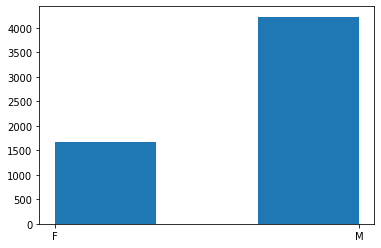

In [5]:
gender_plot = plt.hist(unique_train_df['Gender'], bins=3)
plt.show()

2. The graph below shows the marital status of the customers. 
          0 for Single and 1 for Married      

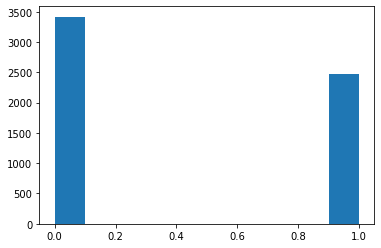

In [6]:
plt.hist(unique_train_df['Marital_Status'])
plt.show()

3. The graph below shows the population densities of customers in the three categories of cities. 
          As can be observed from below, City C has the highest population and A has the lowest..     

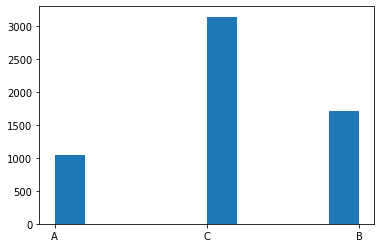

In [7]:
plt.hist(unique_train_df['City_Category'])
plt.show()

4. The graph below shows the how much each age range spent during the period under study. 
          It is obvious that the ages 26-35 spent the highest during Black Friday. This makes logical sense as that age range are mostly youthful workers with the desire to spend.It is also obvious that the ranges 55+ and 0-17 spent the least. 0-17 are highly dependent on parents/guardians whilst 55+ are the older generation and do not care much about discount sales. The modal age range was observed as 46-50. Generally, the highest half with highest spending power are observed to be between 18-45, which support logic as they people in active service with desire and purchasing power.

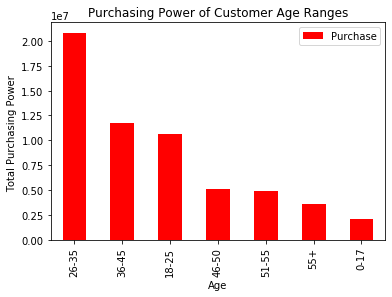

In [8]:
ages = unique_train_df.groupby('Age')
ages_plot = ages[['Purchase']].sum().sort_values('Purchase', ascending=False).plot(kind='bar', color='r')
ages_plot.set_ylabel('Total Purchasing Power ')
ages_plot.set_title('Purchasing Power of Customer Age Ranges')
plt.show()

### Sales
For the following graphs, I visualized some insights based on sales made.

5. The graph below shows the purchasing power based on category of city.  
          Recall that graph 3 above shows population densities of the city categories, however the graph below elaborates on the spending power of these cities. With regards to population, in decreasing order: C-B-A, however in terms of spending power, in decreasing order: B-C-A. This insight suggests that though C has the highest population, it doesnt necessarily have the highest spending power. Further probing could prove that city B could have more youth with highest desire and spending power ie. 24-35. 

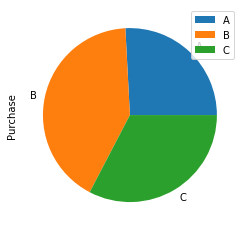

In [9]:
cities = train_df.groupby('City_Category')
cities_plot_1 =cities[['Purchase']].sum().sort_values('City_Category', ascending=True).plot(kind='pie', subplots=True)

plt.show()

6. The graph below compares how each product category fared at Black Friday.
        As graph 5 already suggested, indeed, city B has the highest spending power. But what is the breakdown of product catergoroes purchased?
    - Product Category 1: Cloth
    - Product Category 2: Electronics
    - Product Category 3: Home Goods
        
     In the same order above, it is observed that each city purchased at the same order. This implies, businesses which deal in fashion made of the sales, followed by electronics then to home goods.
        

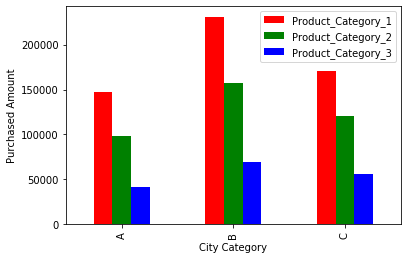

In [10]:
cities_plot_2 = cities[['Product_Category_1','Product_Category_2', 'Product_Category_3']].count().sort_values('City_Category', ascending=True).plot(kind='bar', color='rgb')
cities_plot_2.set_ylabel('Purchased Amount')
cities_plot_2.set_xlabel('City Category')
plt.show()

7. The graph below shows how each product fared at the sale.
        The most successful product with ID P00265242 was purchased 1880 times, the least purchased items eg. with product ID P00231642 was only purchased once. In total 3631 distinct products were sold at Black Friday
   

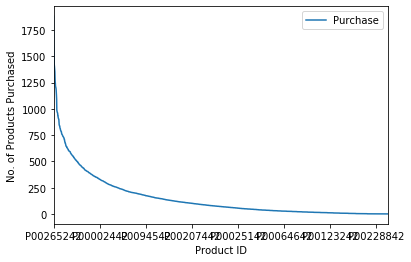

In [11]:
freq_plot = train_df[['Product_ID', 'Purchase']].groupby('Product_ID').count().sort_values('Purchase', ascending=False).plot()
freq_plot.set_ylabel('No. of Products Purchased')
freq_plot.set_xlabel('Product ID')
plt.show()


In [12]:
train_df[['Product_ID', 'Purchase']].groupby('Product_ID').count().sort_values('Purchase', ascending=False)

,Purchase
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00068742,1
P00012342,1
P00162742,1
